In [86]:
!pip install -r /root/workspace/pytorch-pipeline-1/requirements.txt

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [119]:
!python3 /root/workspace/pytorch-pipeline-1/data_preprocessing_gpu/new_datasets.py /root/workspace/pytorch-pipeline-1/data_preprocessing_gpu/preprocessing-config.yml

Using device cuda
OK
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


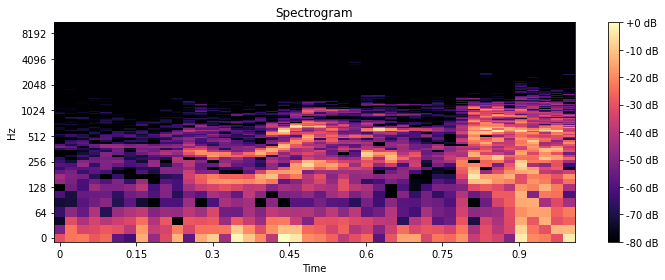

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import torch
import os 
import torch

tens = torch.load('/root/workspace/dataset_2022/mic_dev/preprocessed_dir/processed_fold4_room23_mix001')

S = tens.cpu().numpy()

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(S[0], ref=np.max), y_axis='log', x_axis='time')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

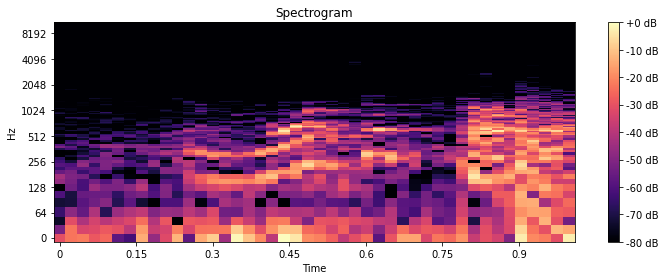

In [121]:
import matplotlib.pyplot as plt
import librosa.display
import torch
import torchaudio

audio = librosa.load('/root/workspace/dataset_2022/mic_dev/dev-test-sony/fold4_room23_mix001.wav')[0]

torch_tensor = torch.from_numpy(audio)

# Compute the spectrogram
S2 = torchaudio.transforms.Spectrogram(n_fft = 1024, hop_length = 512, window_fn=torch.hann_window)(torch_tensor)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(S2[:,:44], ref=np.max), y_axis='log', x_axis='time')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [127]:
torch.norm(S2[:,:44]-S[0])

tensor(9.1926)

In [107]:
S2.shape

torch.Size([513, 2615, 2])

In [111]:
torch_tensor.shape

torch.Size([1338435])

/opt/conda/lib/python3.7/site-packages/torch/functional.py:633: UserWarning: stft will soon require the return_complex parameter be given for real inputs, and will further require that return_complex=True in a future PyTorch release. (Triggered internally at ../aten/src/ATen/native/SpectralOps.cpp:801.)
  normalized, onesided, return_complex)


ValueError: too many values to unpack (expected 2)

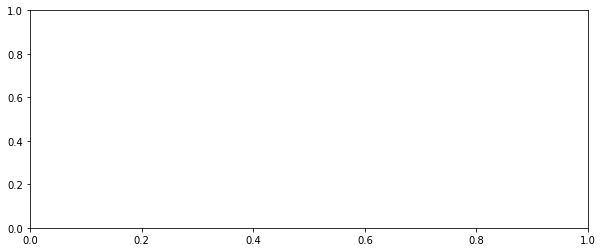

In [74]:
import matplotlib.pyplot as plt
import librosa.display
import torch

audio = librosa.load('/root/workspace/dataset_2022/mic_dev/dev-test-sony/fold4_room23_mix001.wav')[0]

torch_tensor = torch.from_numpy(audio)

# Compute the spectrogram
S2 = torch.stft(torch_tensor, n_fft = 1024, hop_length = 512)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(S2, ref=np.max), y_axis='log', x_axis='time')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [63]:
S-S2[:,:44]

array([[[ 2.0370870e+00+0.0000000e+00j,  2.5122869e-01+0.0000000e+00j,
          2.3931866e+00+0.0000000e+00j, ...,
         -2.2402477e+00+0.0000000e+00j, -8.1145060e-01+0.0000000e+00j,
          5.6639729e+00+0.0000000e+00j],
        [ 4.7482485e-01-3.8286483e-01j,  1.1315916e+00+1.7960161e-01j,
         -1.3891784e+00-8.6966038e-02j, ...,
          5.2584720e-01-1.0102069e+00j,  1.0543588e-01+3.1778646e+00j,
         -2.7168720e+00+5.9673476e-01j],
        [-9.8687619e-01+1.0376180e-01j, -1.4681230e+00-7.6562285e-01j,
          1.5768284e-01-9.6280795e-01j, ...,
          3.5628891e+00-1.0981359e+00j,  1.6876786e+00-1.2739069e+00j,
          1.4825076e+00-5.8014745e-01j],
        ...,
        [-1.4782557e-03-6.8270956e-06j, -2.7779636e-03+3.5978376e-04j,
          2.5239955e-03+8.0570149e-05j, ...,
          1.1723539e-03-2.3996960e-03j, -2.2878994e-03+1.7997553e-03j,
          2.5324307e-03+9.2782854e-04j],
        [-2.7716216e-03+3.4308050e-06j, -1.4546842e-03+1.8218989e-04j,
    

In [ ]:
/usr/bin/python3 -m pip install ipykernel -U --user --force-reinstall

: 